#

> **Note**
>
> Technical analysis in this section follows the wonderful tutorial provided here: \[@FinancialModelingb\]

### **Basic Technical Analysis of the Clorox Company**

We’ll start with providing a simple plot of stock price movement.

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyquant packages ─────────────────────── tidyquant 1.0.10 ──
✔ PerformanceAnalytics 2.0.8      ✔ TTR                  0.24.4
✔ quantmod             0.4.26     ✔ xts                  0.14.1
── Conflicts ────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()         masks base::as.Date.numeric()
✖ PerformanceAnalytics::legend() masks graphics::legend()
✖ quantmod::summary()            masks base::summary()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      

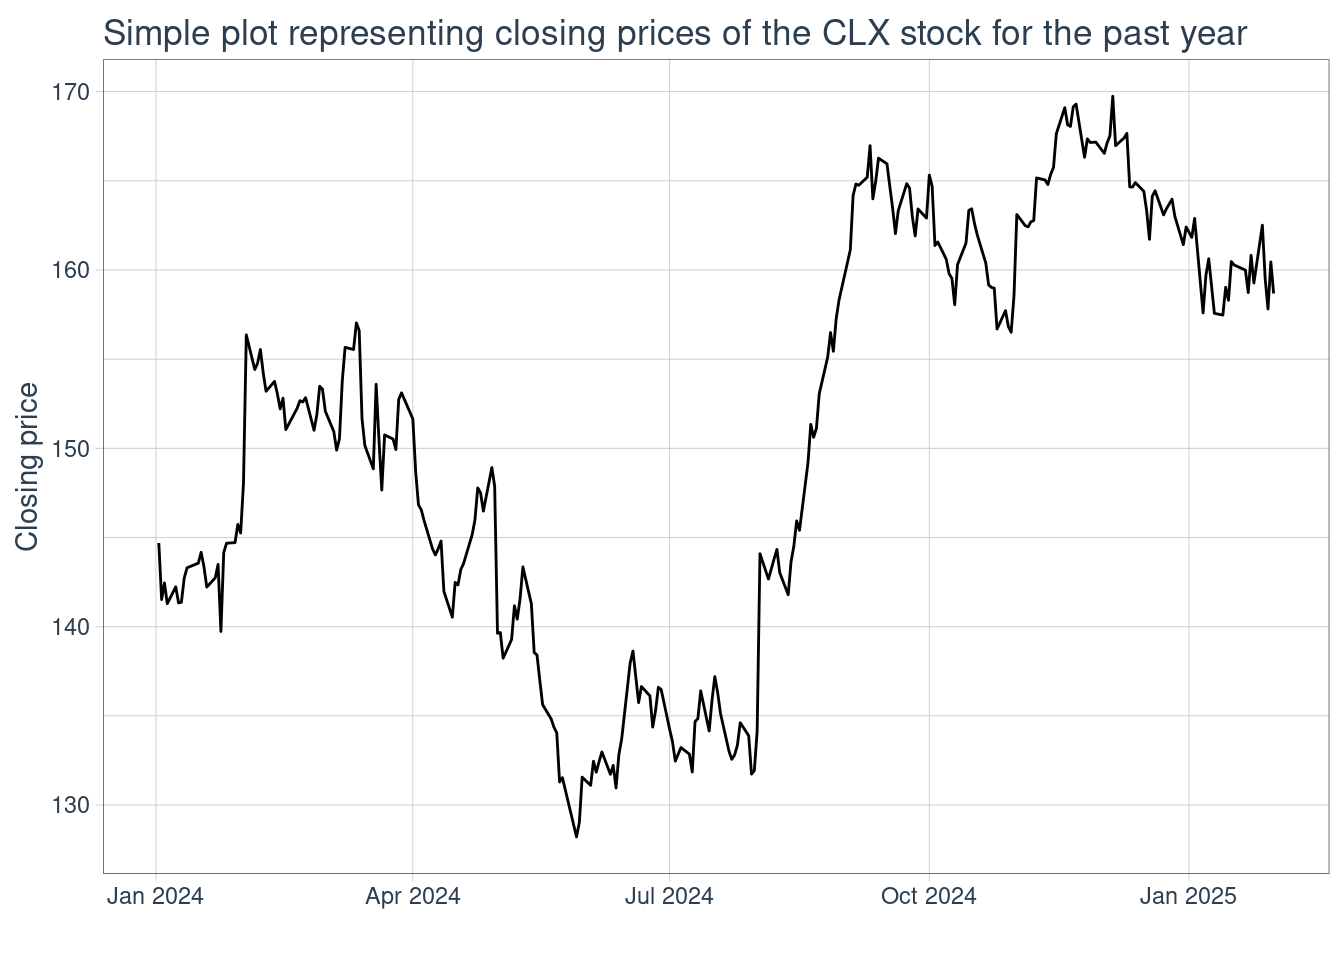

In [ ]:
library(tidyquant)


To identify basic trend in this movement, we then chart the **Simple Moving Average**.

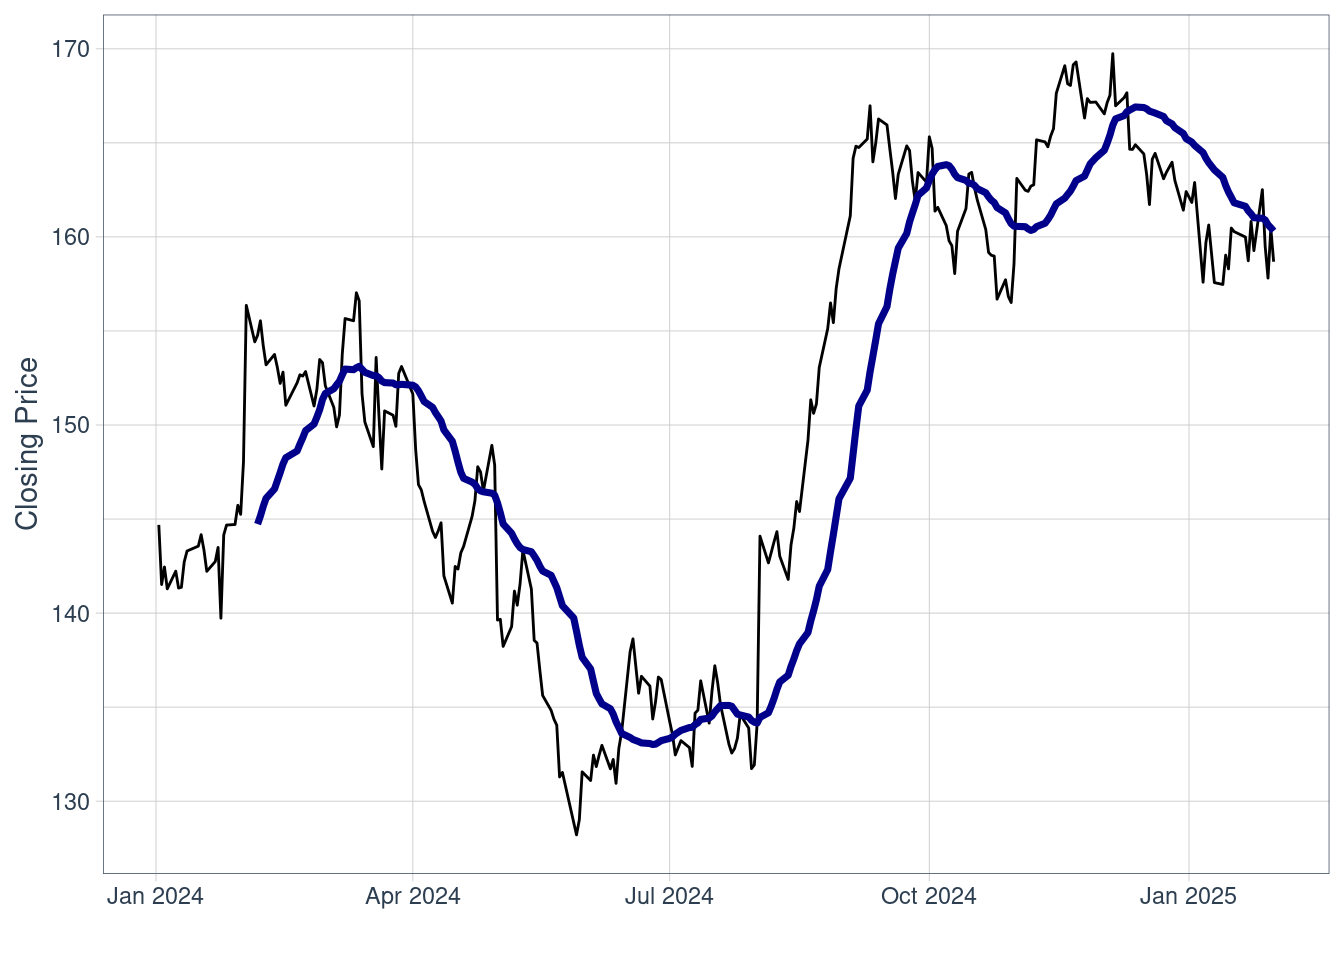

In [ ]:
library(tidyquant)
library(ggplot2)
library(dplyr)
CLX <- tq_get("CLX", get = "stock.prices", from = "2024-01-01", 
               to = "2025-02-01")
CLX |>
  ggplot(aes(x = date, y = close)) +
    geom_line()  +
    geom_ma(ma_fun = SMA, n = 25, linetype = 1, size = 1.25) +
    labs(y = "Closing Price", x = "") + 
    theme_tq()


By playing with the “n” value - the average of the last n-day stock prices - we produced a line that closely resembles the price line. Since the SMA line crosses the price line from top to bottom, we’re supposed to anticipate a drop in the stock price.

**The Bollinger Bands** is another useful tool of technical analysis. These are “envelopes plotted at a standard deviation level above and below a simple moving average of the price” \[@FinancialModelingb\]. They supposed to show the volatility of a price of the stock and the size of expected change of the price in the future.

Let’s demonstrate.

ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?
The following aesthetics were dropped during statistical transformation: open.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?

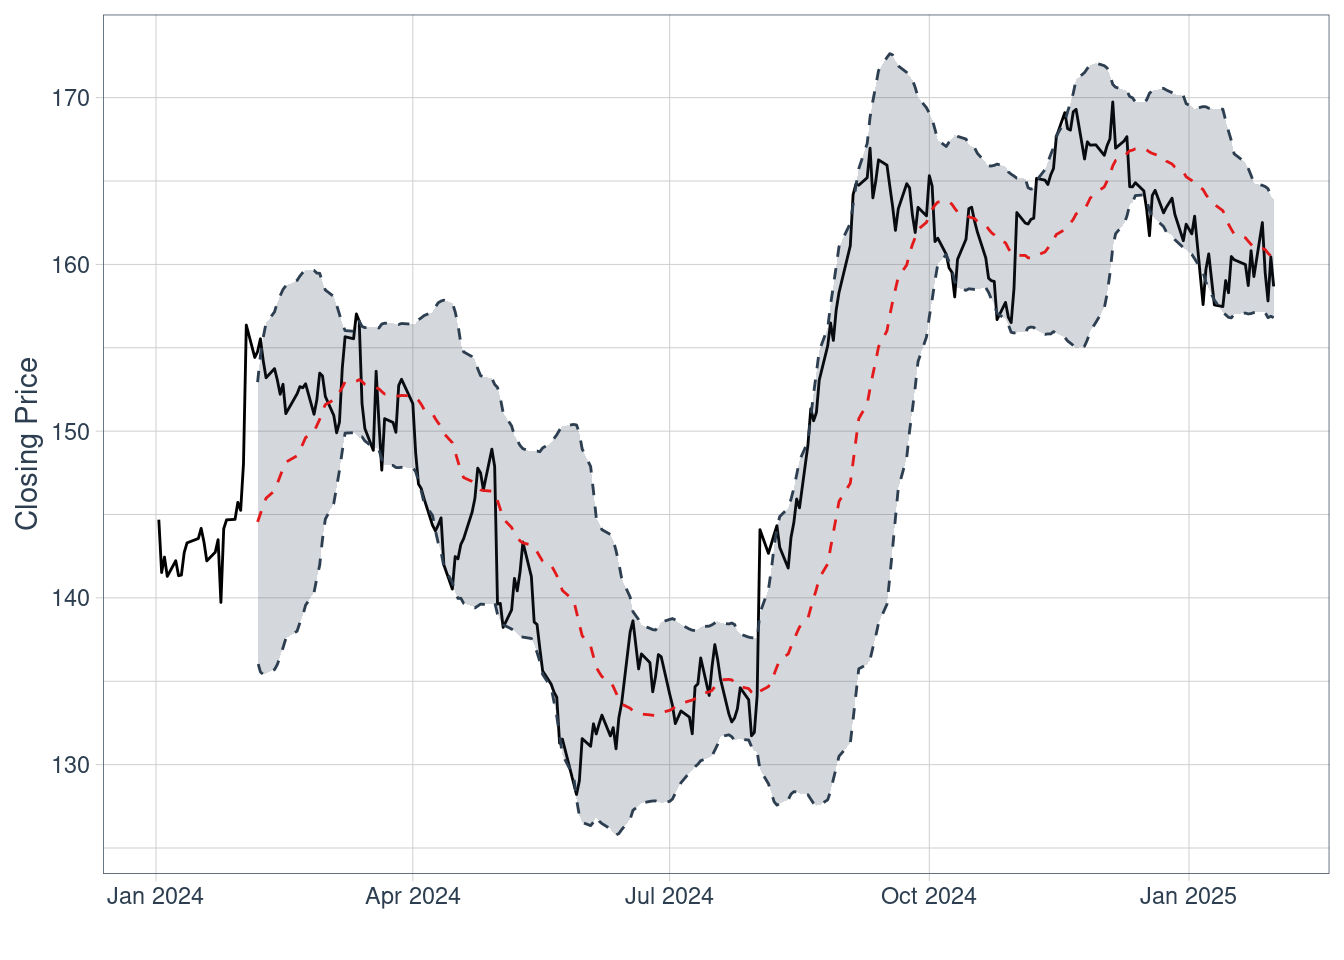

In [ ]:
library(tidyquant)
library(ggplot2)
library(dplyr)
CLX <- tq_get("CLX", get = "stock.prices", from = "2024-01-01", 
               to = "2025-02-01")
CLX |>
  ggplot(aes(x = date, y = close, open = open,
              high = high, low = low, close = close)) +
    geom_line() +
    geom_bbands(ma_fun = SMA, sd = 2, n = 25,
                linetype = 2, size = 0.5, alpha = 0.2,
                fill        = palette_light()[[1]],
                color_bands = palette_light()[[1]],
                color_ma    = palette_light()[[2]]) +
    labs(y = "Closing Price", x = "") +
    theme_tq()


And finally let’s look at such charts for major competitors to get the feel of the market.

ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?
The following aesthetics were dropped during statistical transformation: open.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?
The following aesthetics were dropped during statistical transformation: open.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?
The following aesthetics were dropped during statistical transformation: open.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?

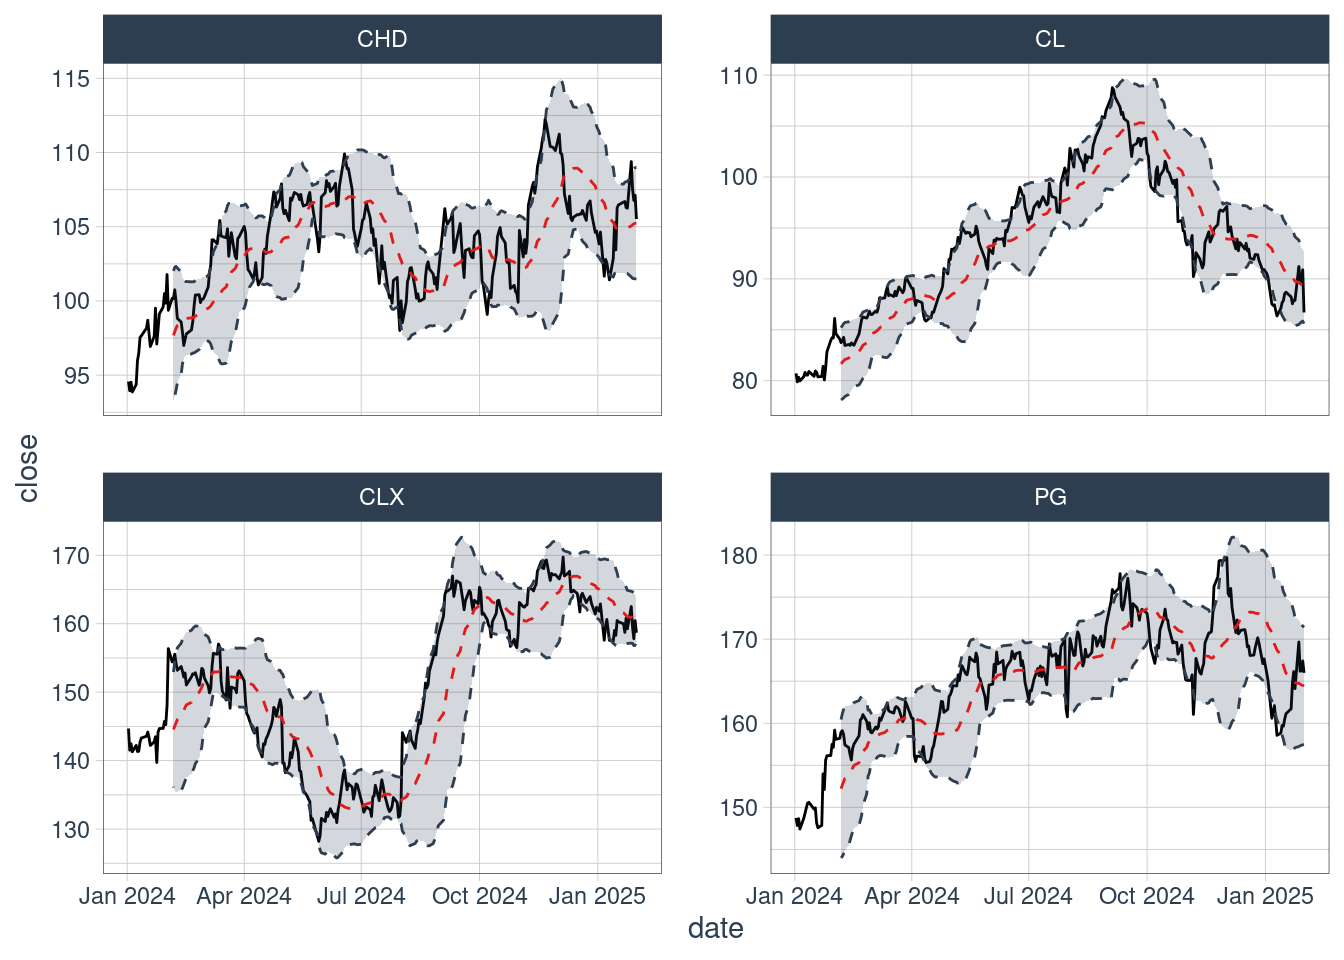

In [ ]:
library(tidyquant)
library(ggplot2)
library(dplyr)
prices <- tq_get(c("CLX", "CL", "PG", "CHD"), get = "stock.prices", from = "2024-01-01", 
  to = "2025-02-01")
prices |>
  ggplot(aes(x = date, y = close, open = open,
              high = high, low = low, close = close)) +
    geom_line() +
    geom_bbands(ma_fun = SMA, sd = 2, n = 25,
                linetype = 2, size = 0.5, alpha = 0.2,
                fill        = palette_light()[[1]],
                color_bands = palette_light()[[1]],
                color_ma    = palette_light()[[2]]) +
    facet_wrap(~ symbol, ncol = 2, scales = "free_y") +
    theme_tq()


As we can see, the volatility of the stock prices shouldn’t be that great in the near future. Since technical analysis is best-suited for short-term trading, near future is all we can advise or client on based on such analysis.

### **Conclusion**

We can use “tidyquant” R language package along with other packages for producing charts to perform basic technical analysis of stock price. The analysis predicts stable performance in the short term.